<a href="https://colab.research.google.com/github/suvajitdey2000/suvajitdey2000/blob/main/GEE_Heatwave_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import ee
import geemap
import xarray as xr

In [14]:
!pip install xee
import xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00


In [15]:
ee.Authenticate()
ee.Initialize(project='gee-suvajitdey2000', opt_url='https://earthengine-highvolume.googleapis.com')

In [16]:
map = geemap.Map(basemap='SATELLITE')
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [67]:
roi = map.draw_last_feature.geometry()

In [68]:
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          65.209287,
                          -9.275622
                        ],
                        [
                          65.209287,
                          37.71859
                        ],
                        [
                          106.152818,
                          37.71859
                        ],
                        [
                          106.152818,
                          -9.275622
                        ],
                        [
                          65.209287,
                          -9.275622
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [118]:
collection = ee.ImageCollection("ECMWF/ERA5/DAILY").select('maximum_2m_air_temperature').filterDate('1980','2025').map(
    lambda img: img.subtract(273.15).copyProperties(img, img.propertyNames())
)

In [119]:
ds = xr.open_dataset(
    collection,
    engine ='ee',
    crs ='EPSG:4326',
    scale = 0.27,
    geometry = roi
)

In [120]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:                     (time: 14801, lon: 152, lat: 174)
Coordinates:
  * time                        (time) datetime64[ns] 118kB 1980-01-01 ... 20...
  * lon                         (lon) float64 1kB 65.34 65.61 ... 105.8 106.1
  * lat                         (lat) float64 1kB -9.141 -8.871 ... 37.3 37.57
Data variables:
    maximum_2m_air_temperature  (time, lon, lat) float32 2GB ...
Attributes: (12/36)
    date_range:               [284083200000, 1594252800000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594797432309553
    period:                   1
    period_mapping:           [284083200000, 1594252800000]
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Daily mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

In [121]:
ds.maximum_2m_air_temperature.attrs['units'] = 'degC'

In [122]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:                     (time: 14801, lon: 152, lat: 174)
Coordinates:
  * time                        (time) datetime64[ns] 118kB 1980-01-01 ... 20...
  * lon                         (lon) float64 1kB 65.34 65.61 ... 105.8 106.1
  * lat                         (lat) float64 1kB -9.141 -8.871 ... 37.3 37.57
Data variables:
    maximum_2m_air_temperature  (time, lon, lat) float32 2GB ...
Attributes: (12/36)
    date_range:               [284083200000, 1594252800000]
    description:              <p>ERA5 is the fifth generation ECMWF atmospher...
    keywords:                 ['climate', 'copernicus', 'dewpoint', 'ecmwf', ...
    max_mirrored_version:     1594797432309553
    period:                   1
    period_mapping:           [284083200000, 1594252800000]
    ...                       ...
    visualization_3_bands:    u_component_of_wind_10m
    visualization_3_max:      30.0
    visualization_3_min:      0.0
    visualization_3_name:     Daily mean u-component of wind at 10m
    visualization_3_palette:  #FFFFFF,#FFFF71,#DEFF00,#9EFF00,#77B038,#007E55...
    crs:                      EPSG:4326

In [123]:
!pip install xclim
import xclim

In [124]:
help(xclim.indices.heat_wave_index)

Help on function heat_wave_index in module xclim.indices._threshold:

heat_wave_index(tasmax: 'xarray.DataArray', thresh: 'Quantified' = '25.0 degC', window: 'int' = 5, freq: 'str' = 'YS', op: 'str' = '>', resample_before_rl: 'bool' = True) -> 'xarray.DataArray'
    Heat wave index.
    
    Number of days that are part of a heatwave, defined as five or more consecutive days over a threshold of 25℃.
    
    Parameters
    ----------
    tasmax : xarray.DataArray
        Maximum daily temperature.
    thresh : Quantified
        Threshold temperature on which to designate a heatwave.
    window : int
        Minimum number of days with temperature above threshold to qualify as a heatwave.
    freq : str
        Resampling frequency.
    op : {">", ">=", "gt", "ge"}
        Comparison operation. Default: ">".
    resample_before_rl : bool
        Determines if the resampling should take place before or after the run
        length encoding (or a similar algorithm) is applied to runs.
  

In [125]:
index = xclim.indices.heat_wave_index(
    ds.maximum_2m_air_temperature,
    thresh= '40.0 degC',
    window= 5,
    freq= 'YS'
)

In [126]:
index

<xarray.DataArray 'maximum_2m_air_temperature' (time: 41, lon: 152, lat: 174)> Size: 9MB
array([[[ 0.,  0.,  0., ..., 27., 28., 28.],
        [ 0.,  0.,  0., ..., 26., 28., 26.],
        [ 0.,  0.,  0., ..., 17., 21., 10.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 11., 10., 10.],
        [ 0.,  0.,  0., ..., 11., 11., 10.],
        [ 0.,  0.,  0., ..., 11., 11.,  5.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 14., 14., 12.],
        [ 0.,  0.,  0., ..., 15., 15., 12.],
        [ 0.,  0.,  0., ..., 15., 15., 11.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 34., 34., 35.],
        [ 0.,  0.,  0., ..., 34., 34., 34.],
        [ 0.,  0.,  0., ..., 34., 34., 32.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 11., 12., 12.],
        [ 0.,  0.,  0., ..., 11., 12.,  6.],
        [ 0.,  0.,  0., ..., 11., 11.,  6.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * lon      (lon) float64 1kB 65.34 65.61 65.88 66.15 ... 105.6 105.8 106.1
  * lat      (lat) float64 1kB -9.141 -8.871 -8.601 -8.331 ... 37.03 37.3 37.57
  * time     (time) datetime64[ns] 328B 1980-01-01 1981-01-01 ... 2020-01-01
Attributes:
    units:    d

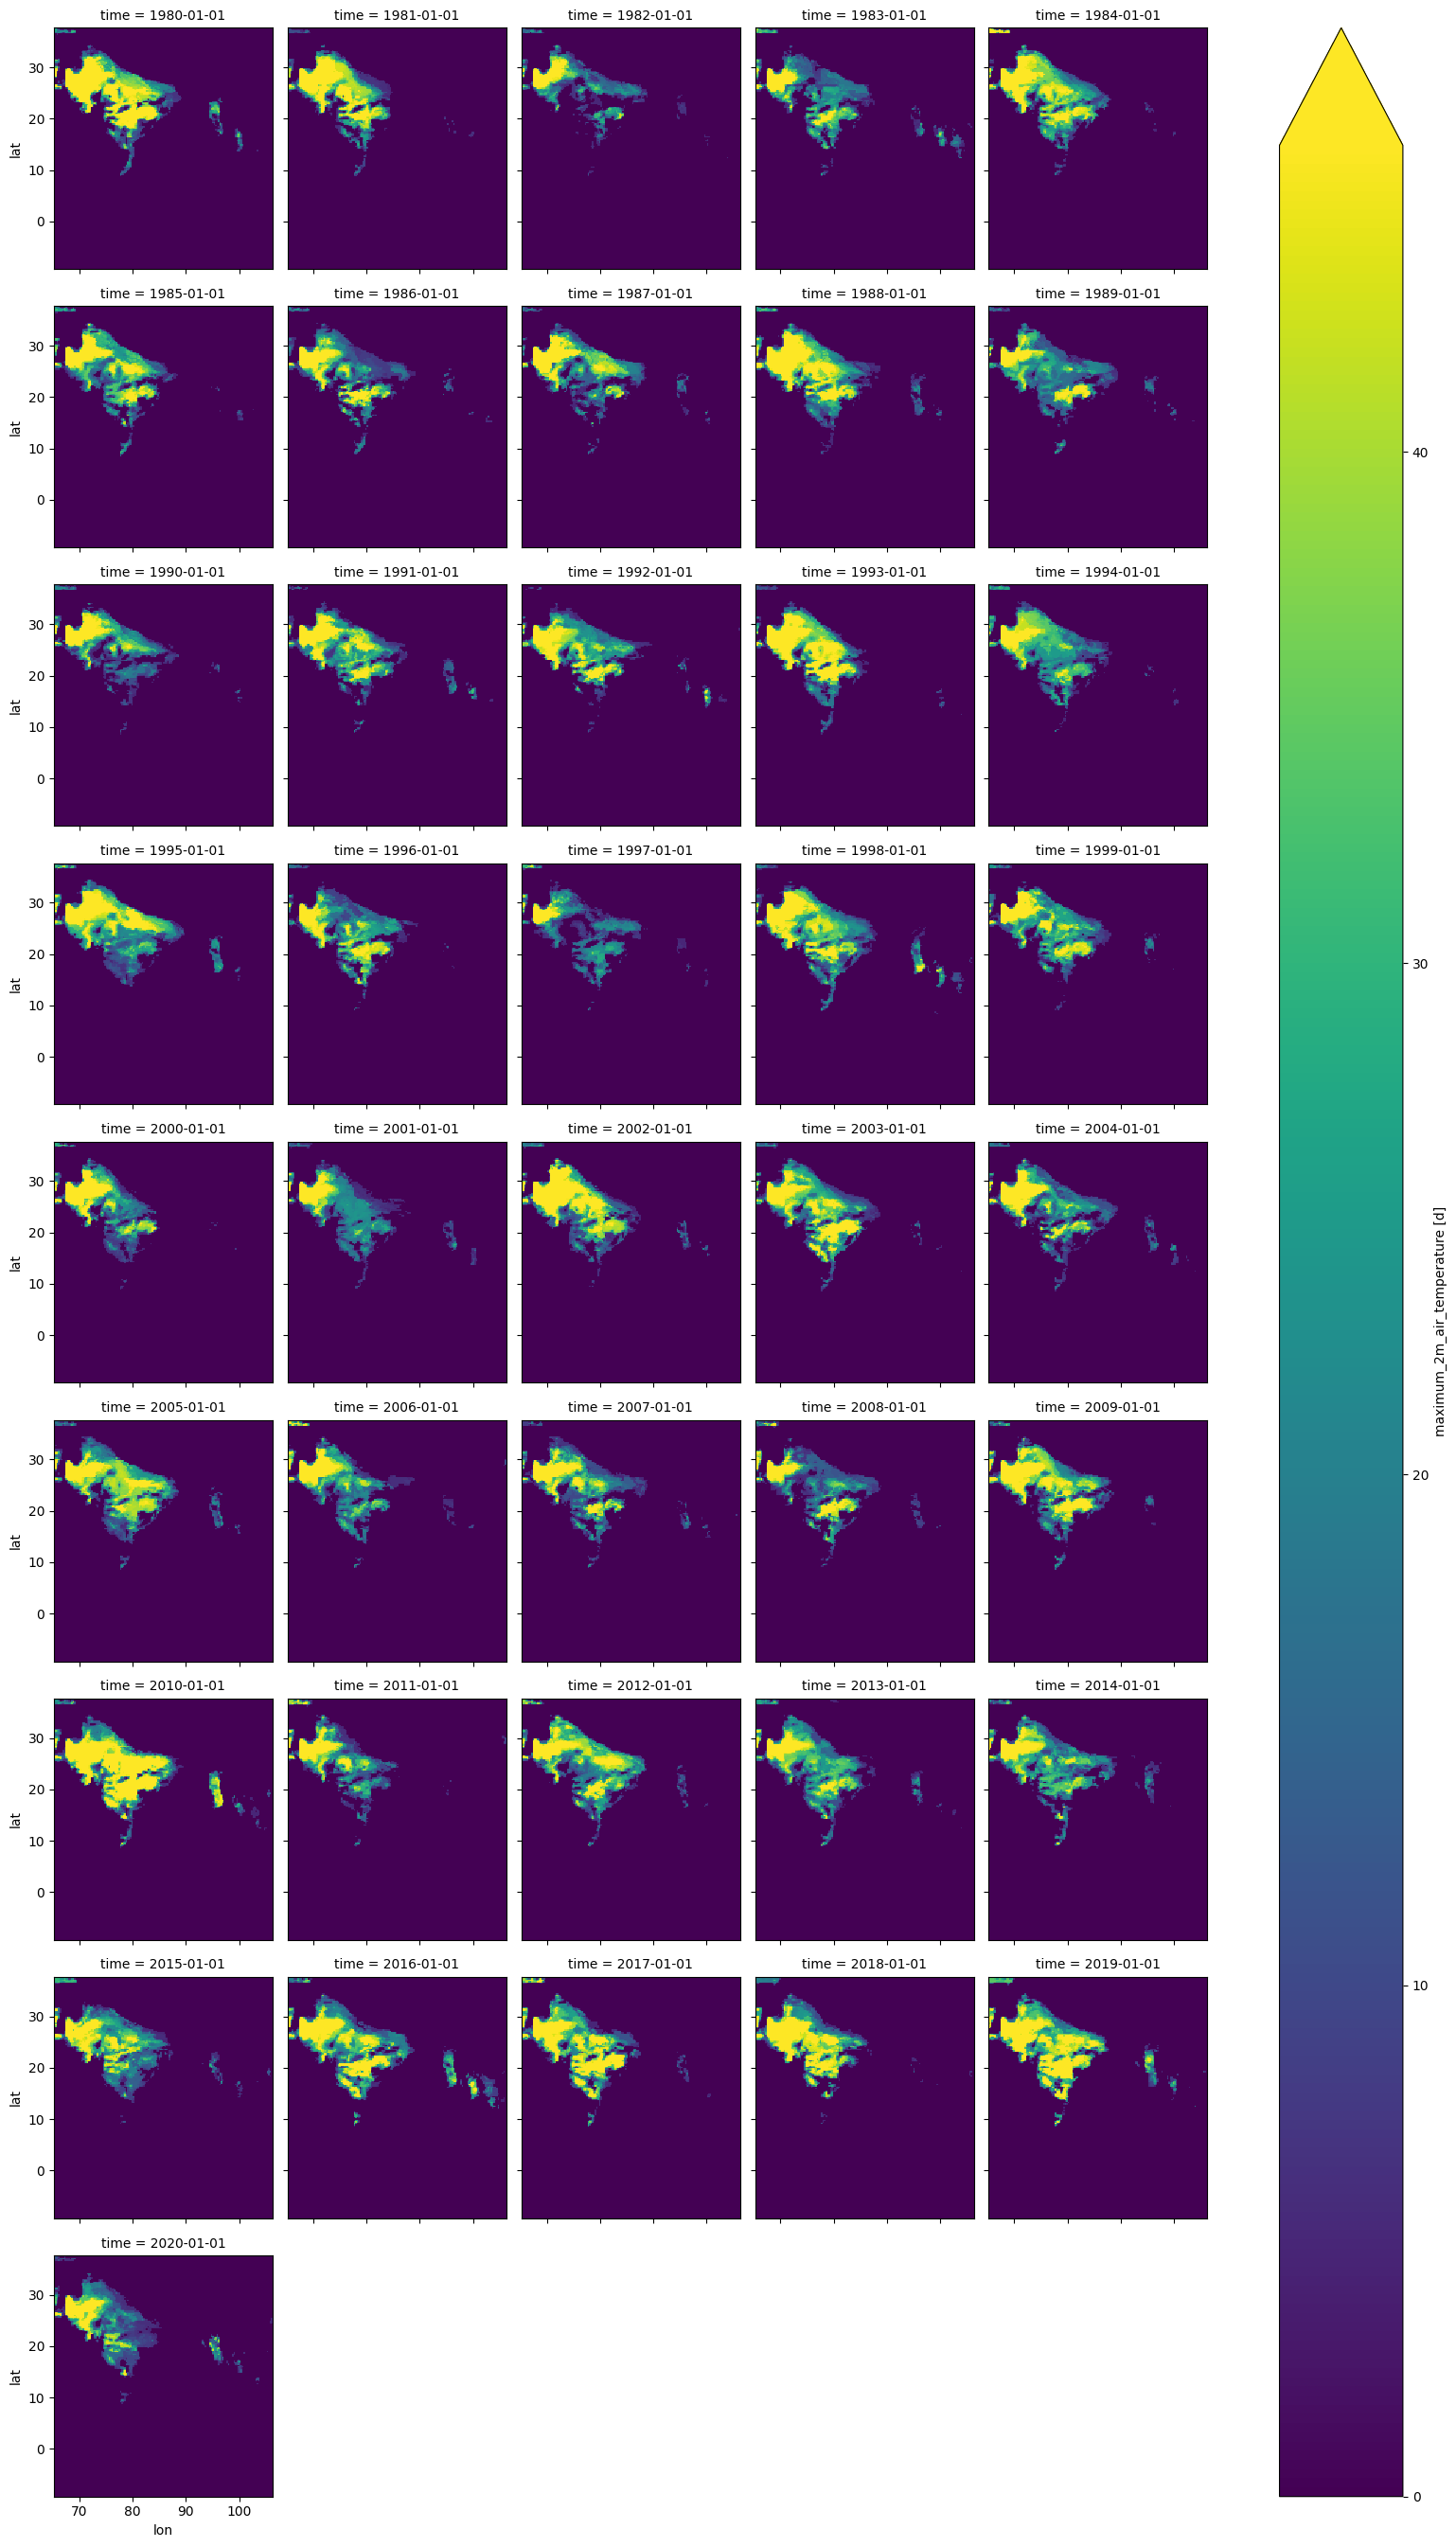

In [127]:
index.plot(x='lon', y='lat', col='time', robust= True, col_wrap=5)

In [155]:
index3 = index.resample(time='1Y').max(dim='time')

In [156]:
sub = index.sel(lon= 28.63248133816089 , lat= 77.219758439697 , method='nearest')

In [157]:
sub

<xarray.DataArray 'maximum_2m_air_temperature' (time: 9)> Size: 72B
array([28., 48., 24., 25., 31., 20., 26., 40., 39.])
Coordinates:
    lon      float64 8B 65.34
    lat      float64 8B 37.57
  * time     (time) datetime64[ns] 72B 1980-12-31 1985-12-31 ... 2020-12-31
Attributes:
    units:    d

In [164]:
df = sub.to_dataframe()['maximum_2m_air_temperature']

In [165]:
import pandas as pd

In [169]:
df.to_csv('heat_wave.csv')

In [167]:
df

,maximum_2m_air_temperature
time,
1980-12-31,28.0
1985-12-31,48.0
1990-12-31,24.0
1995-12-31,25.0
2000-12-31,31.0
2005-12-31,20.0
2010-12-31,26.0
2015-12-31,40.0
2020-12-31,39.0
